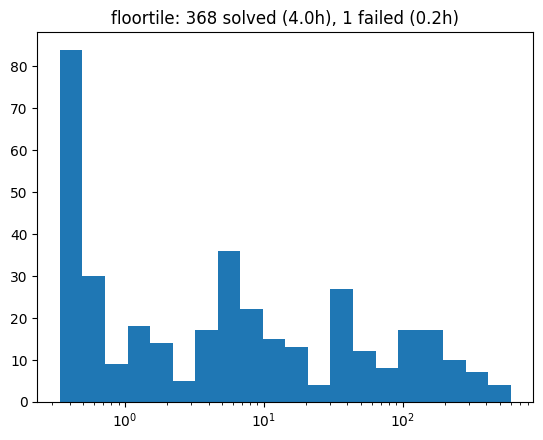

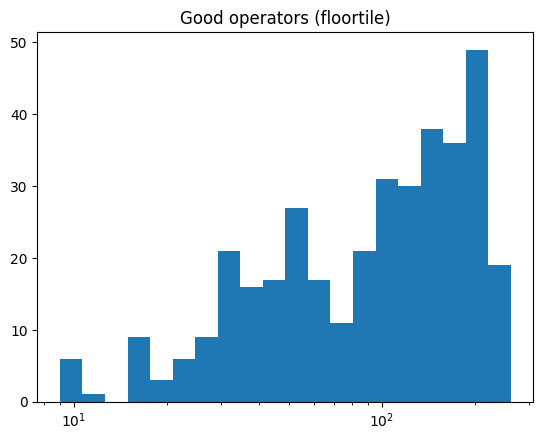

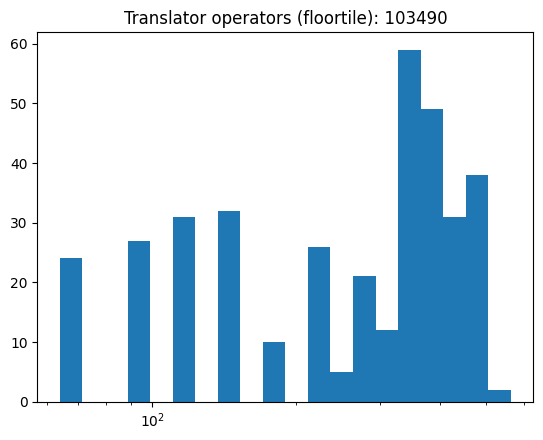

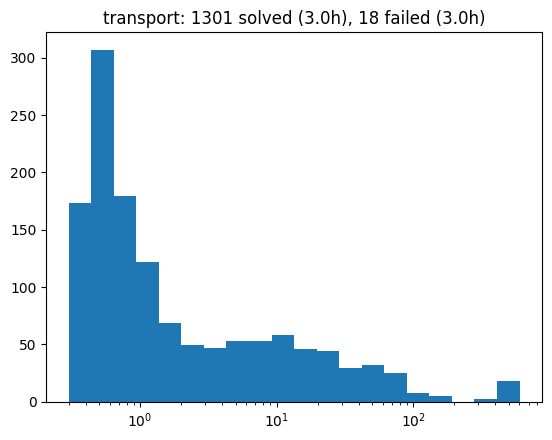

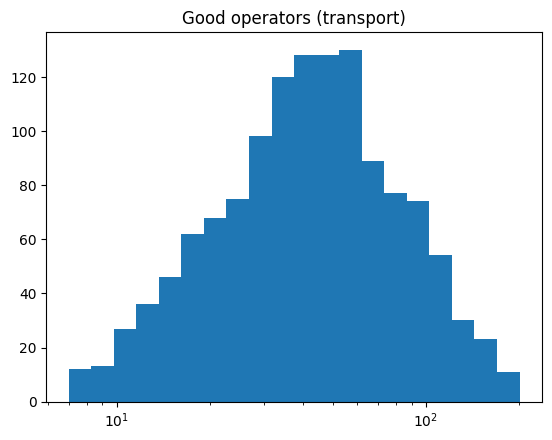

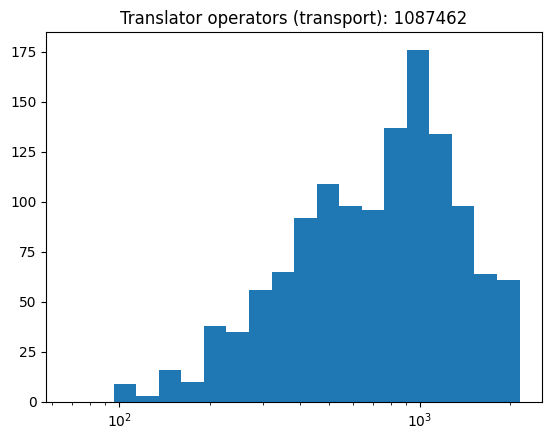

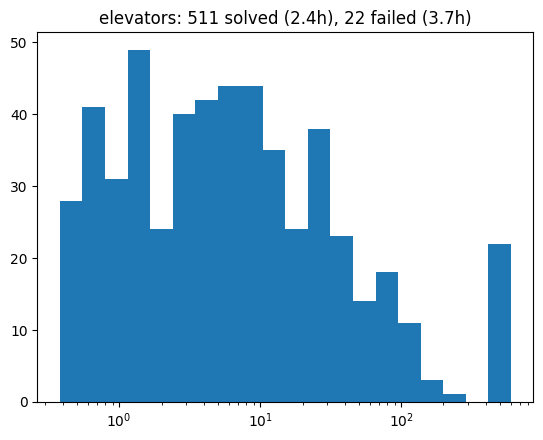

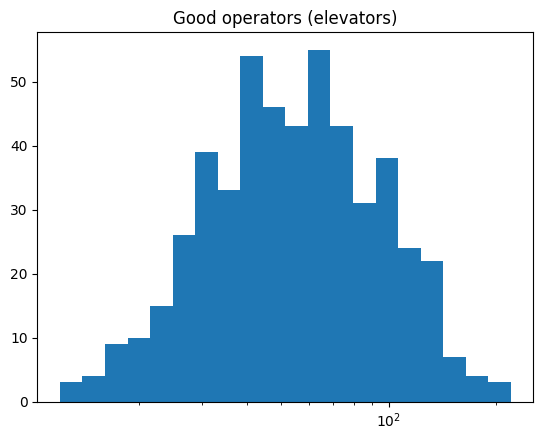

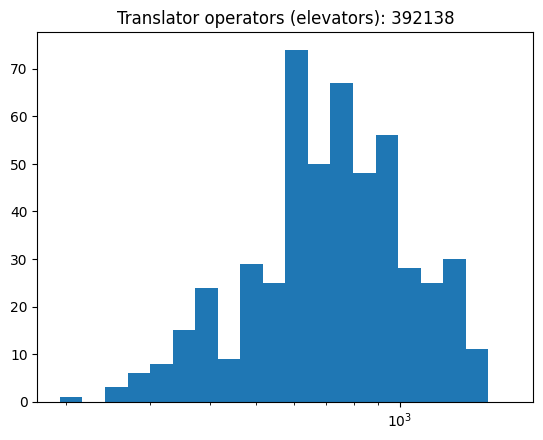

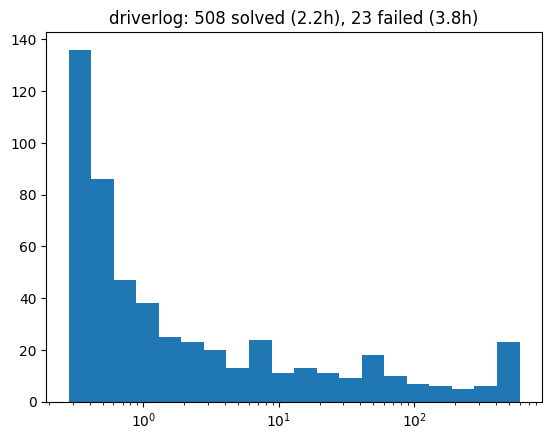

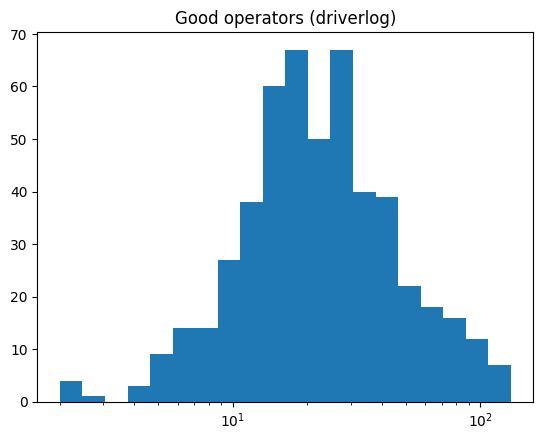

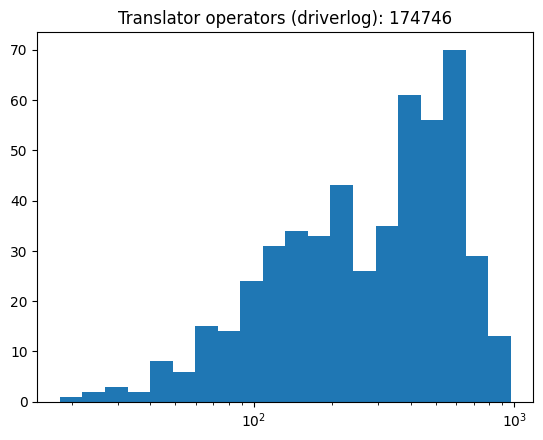

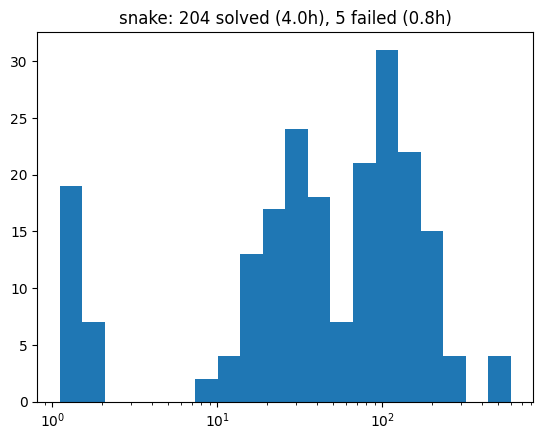

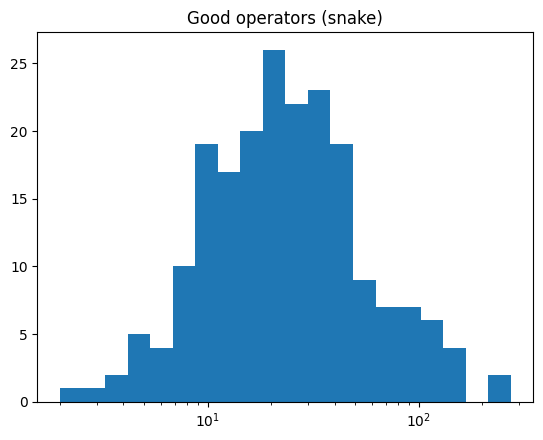

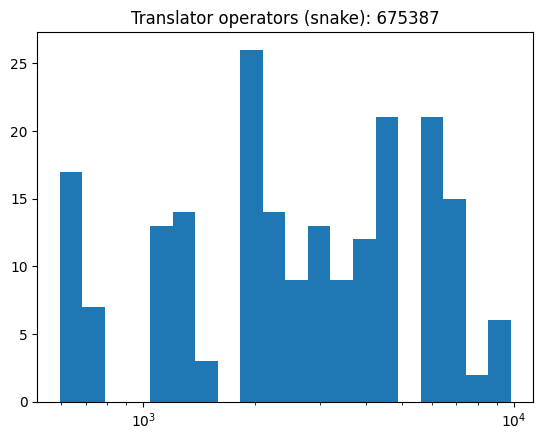

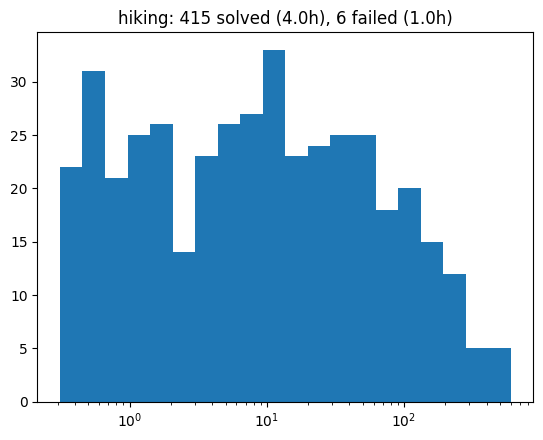

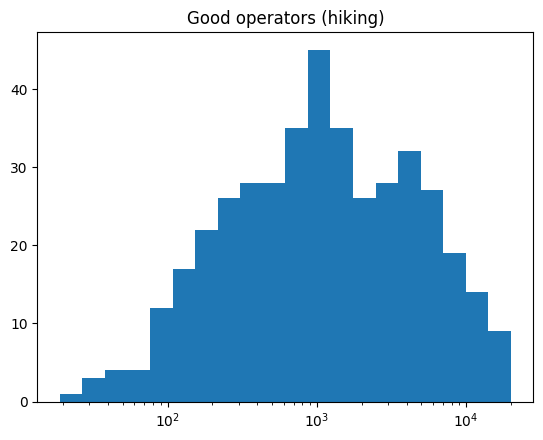

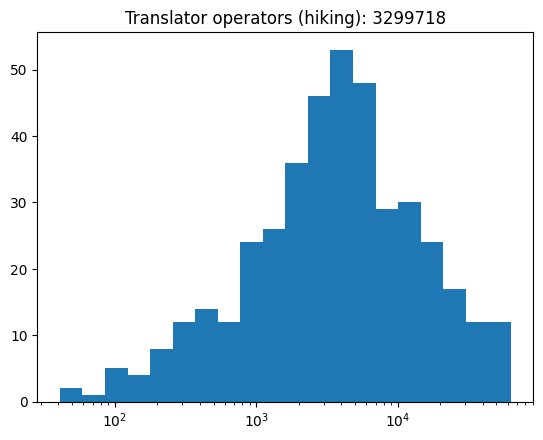

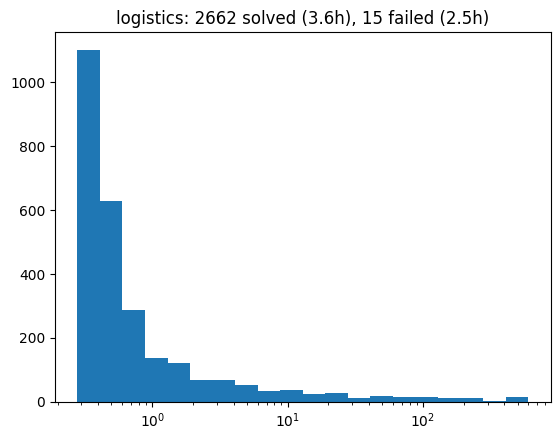

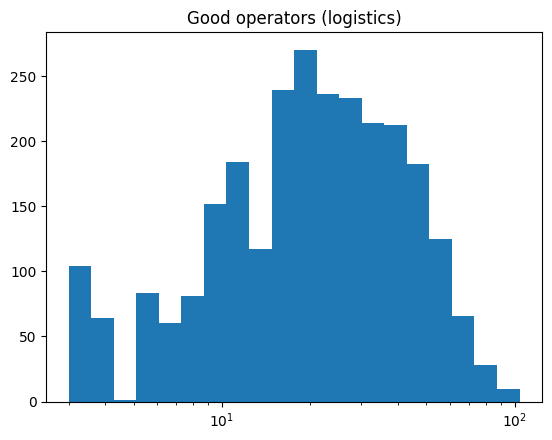

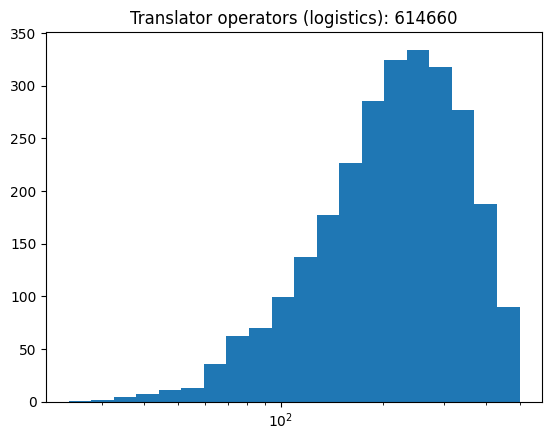

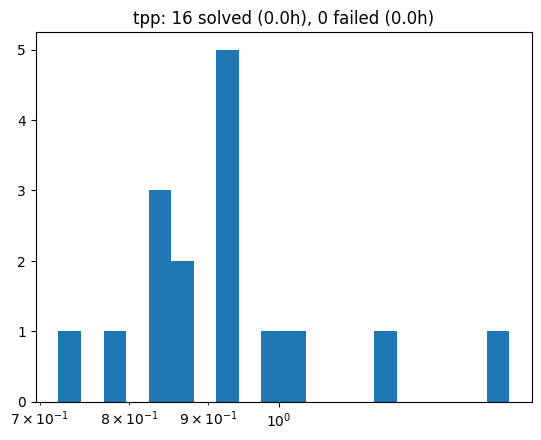

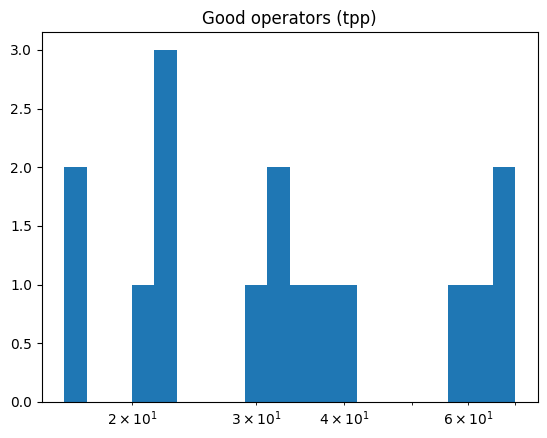

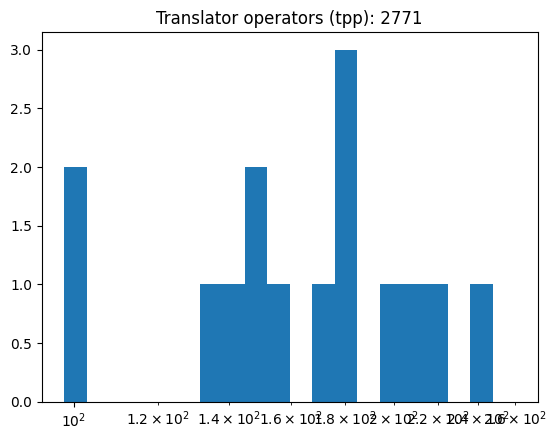

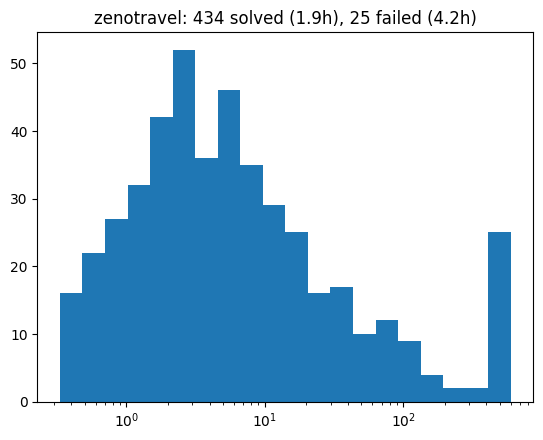

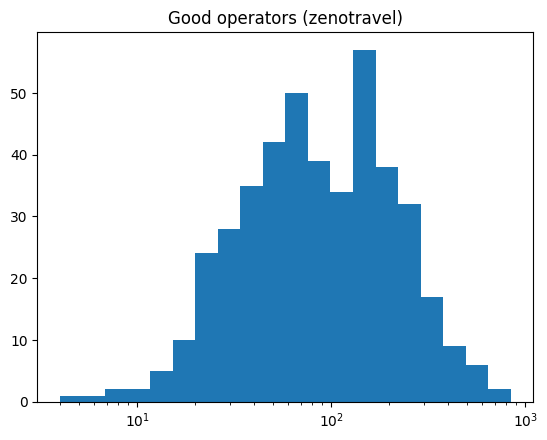

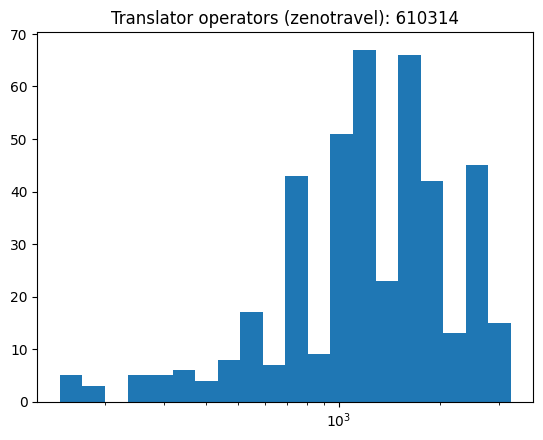

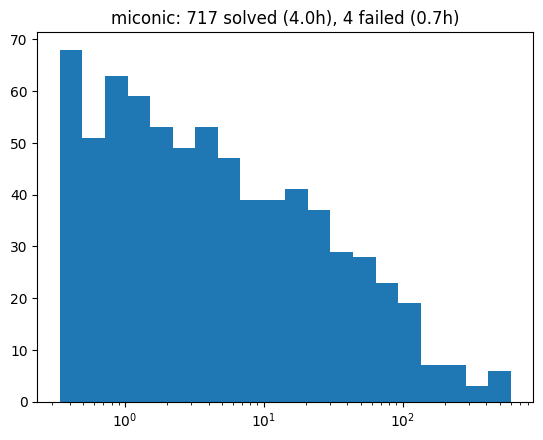

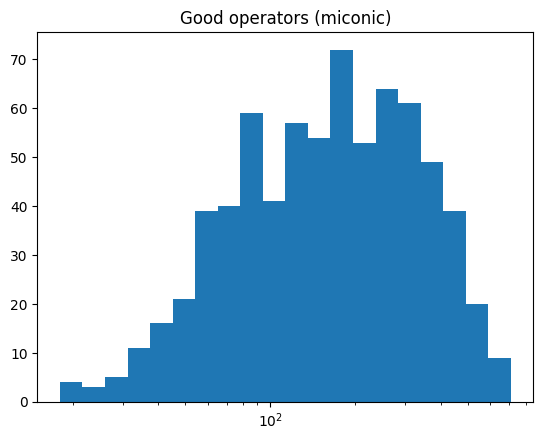

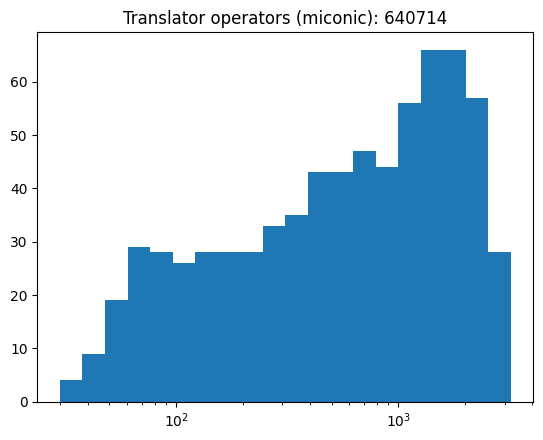

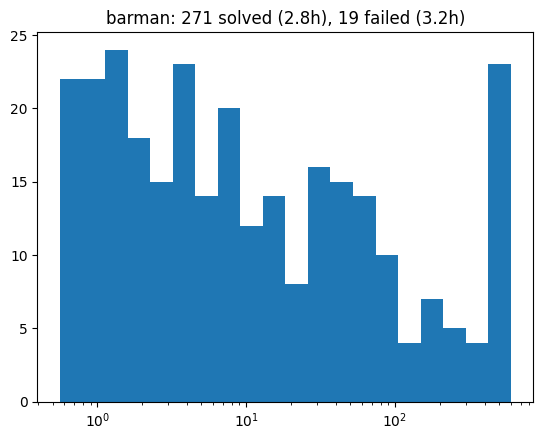

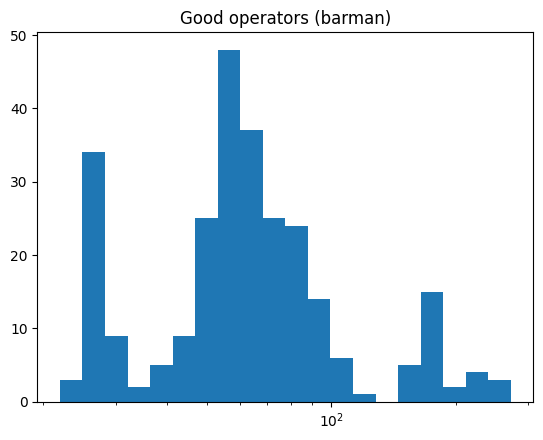

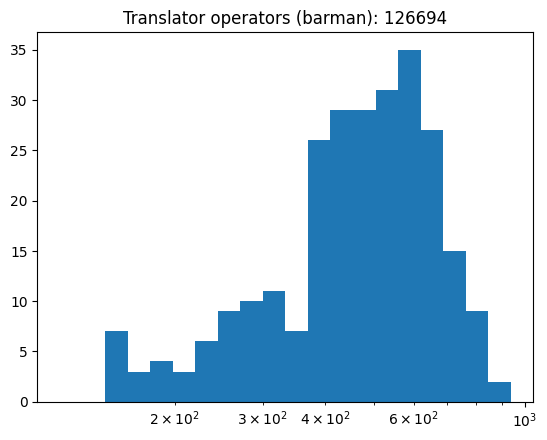

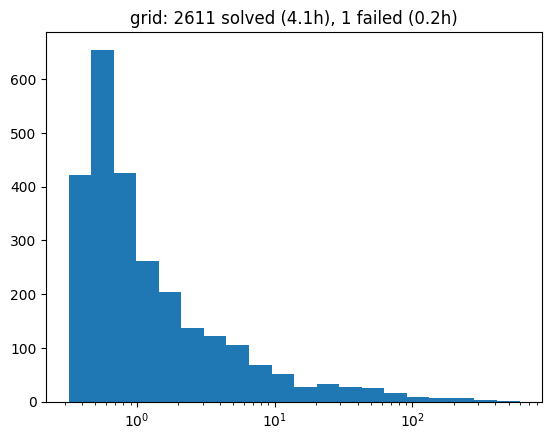

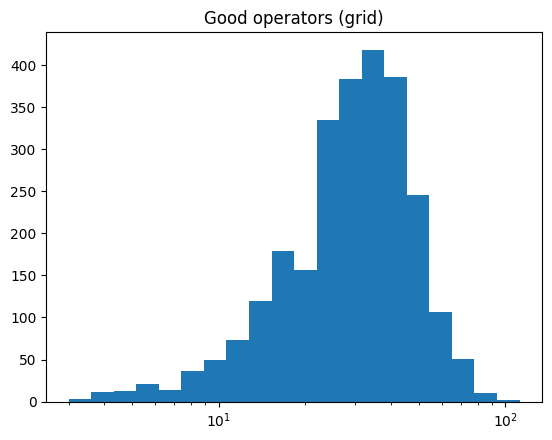

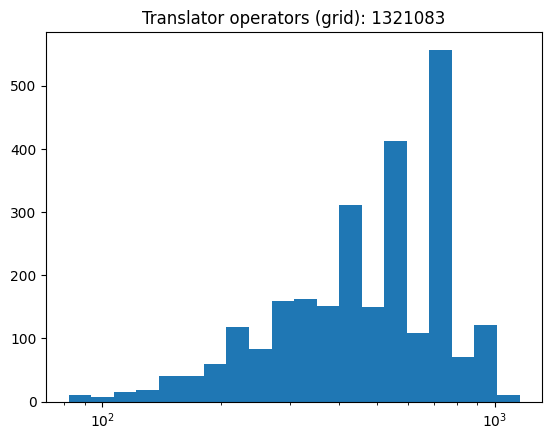

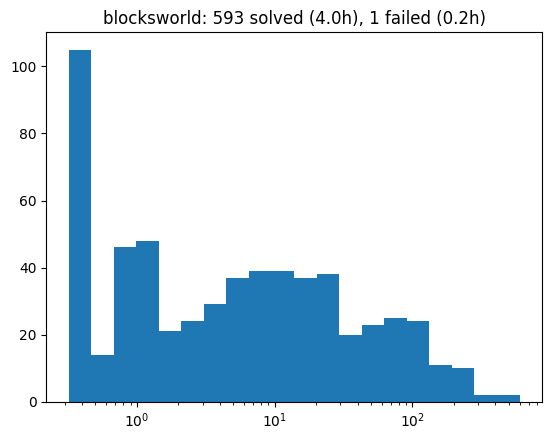

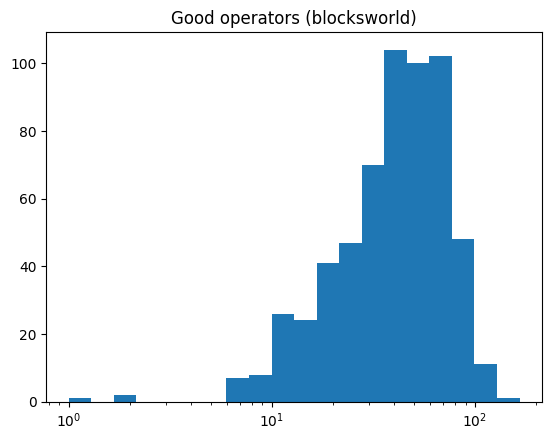

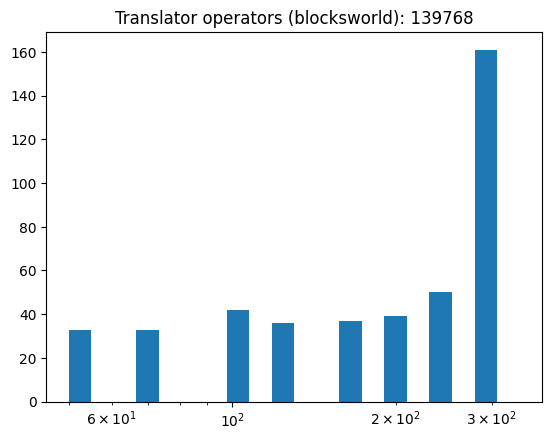

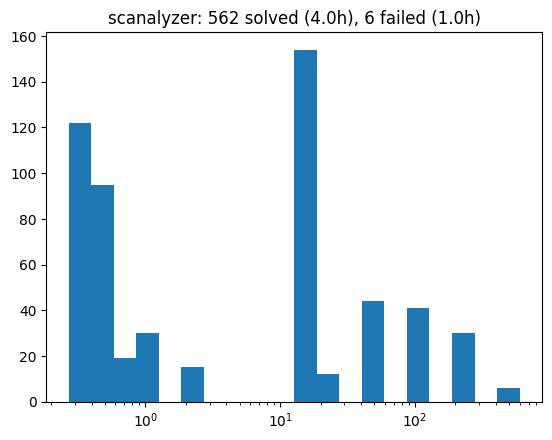

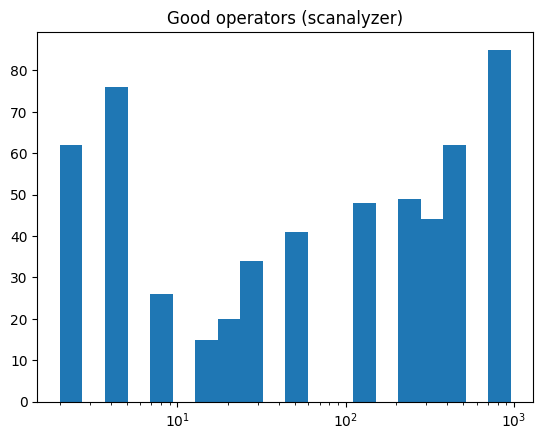

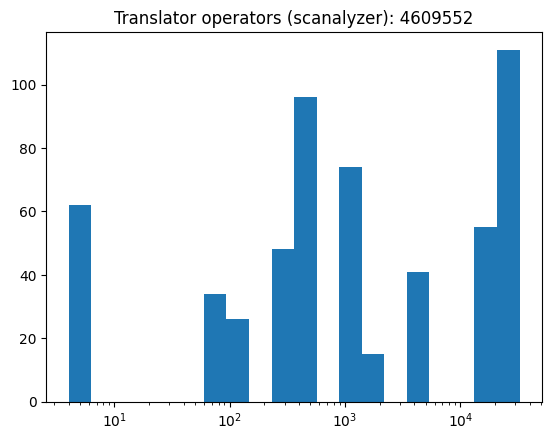

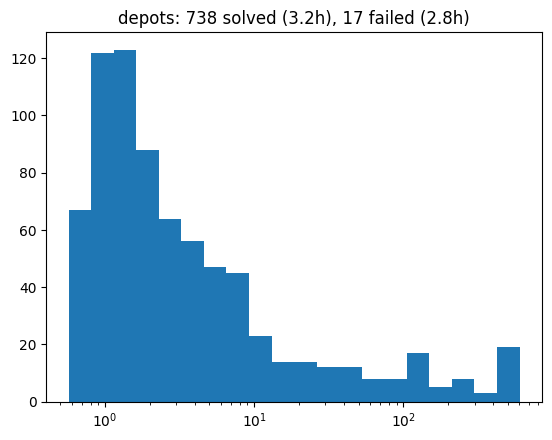

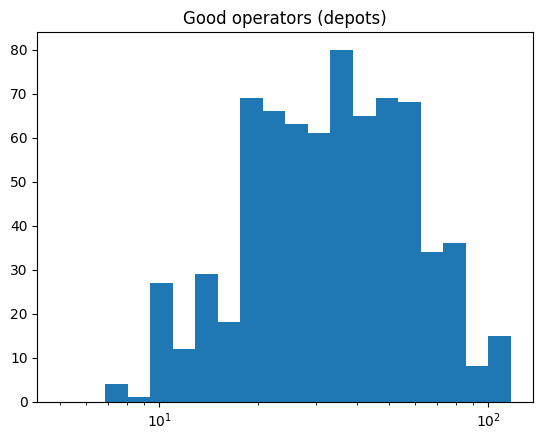

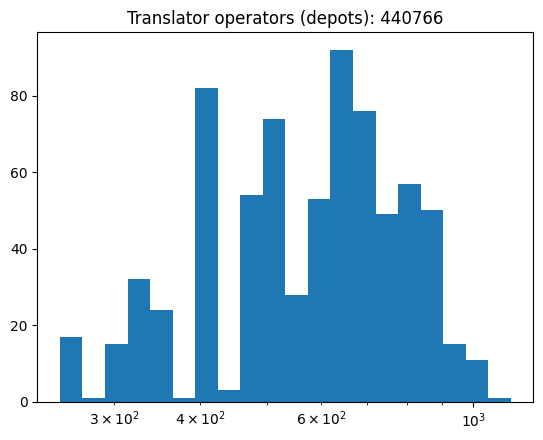

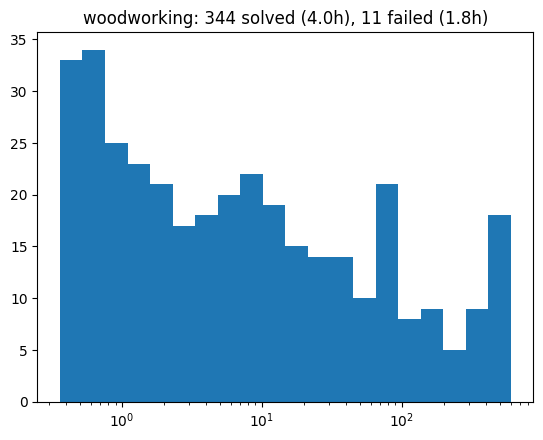

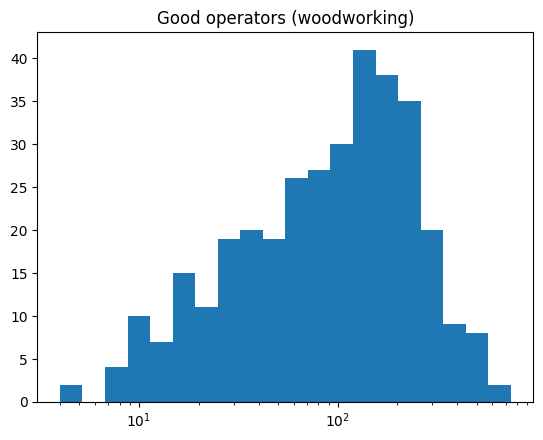

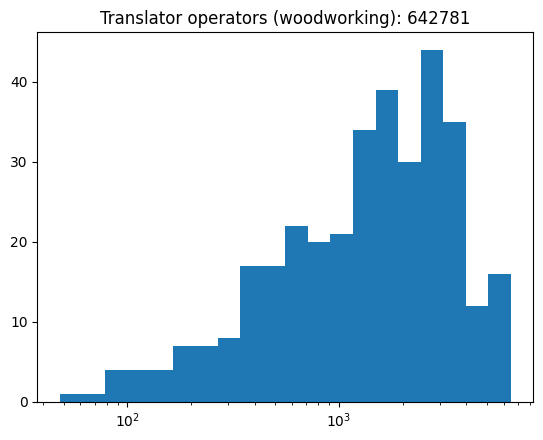

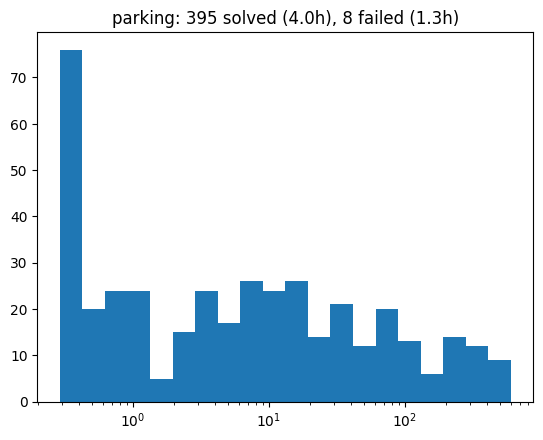

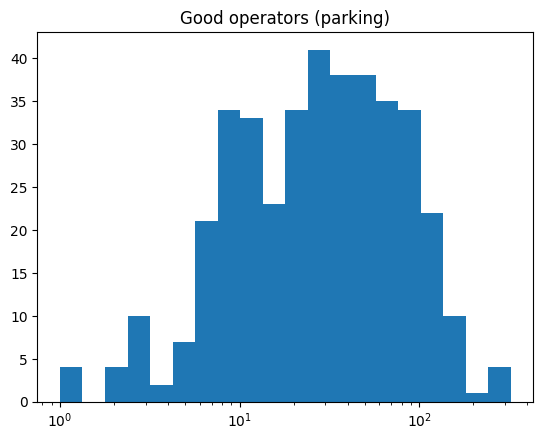

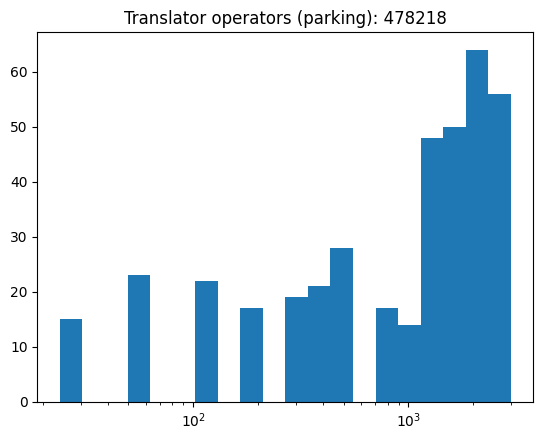

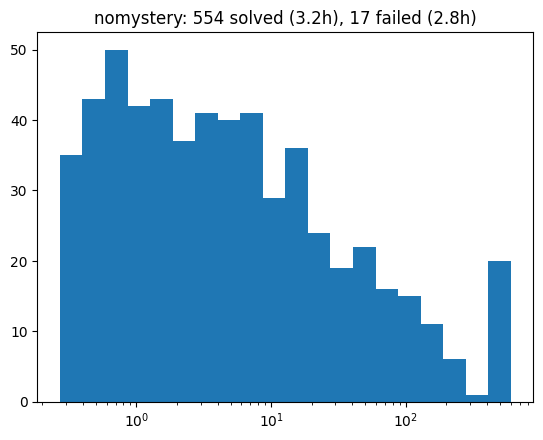

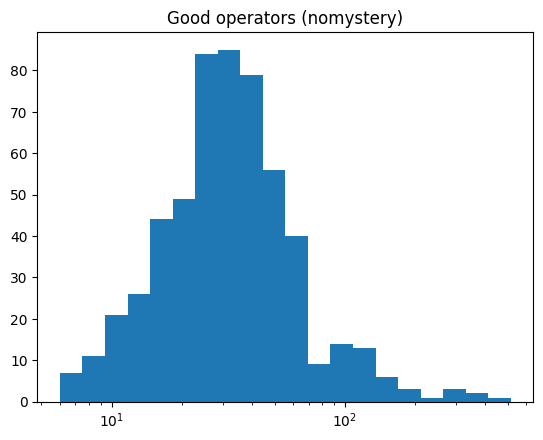

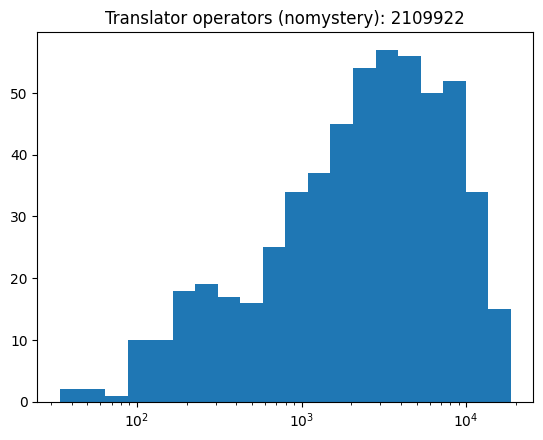

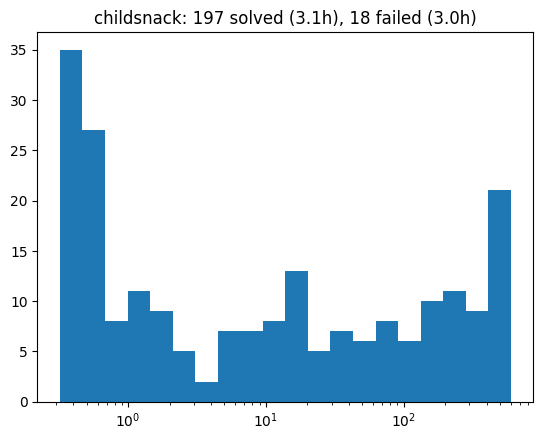

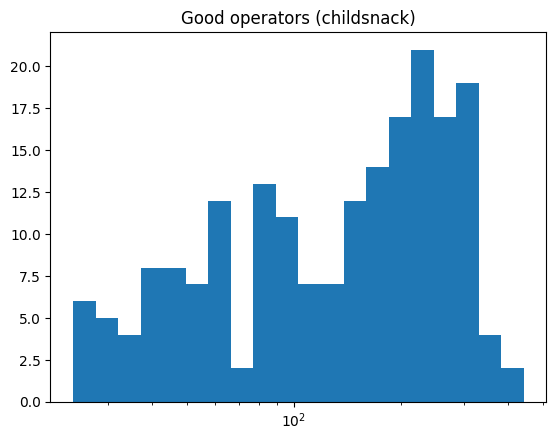

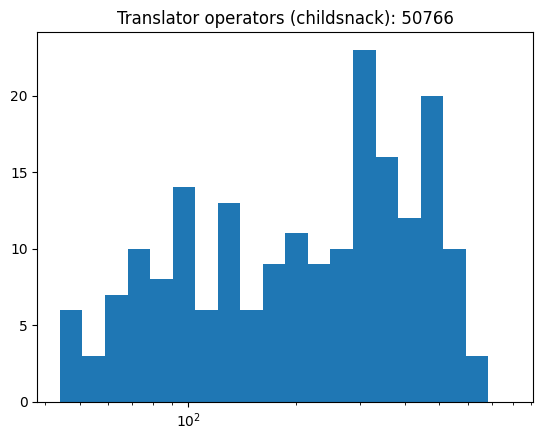

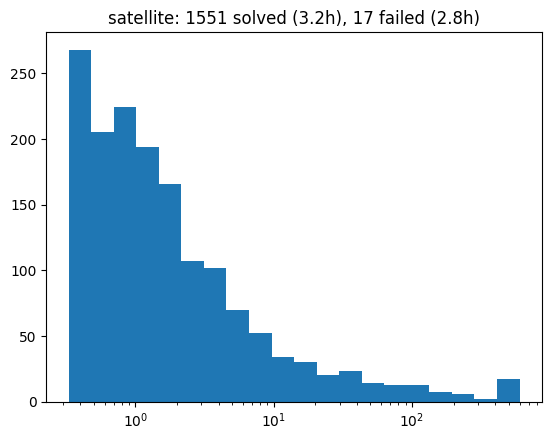

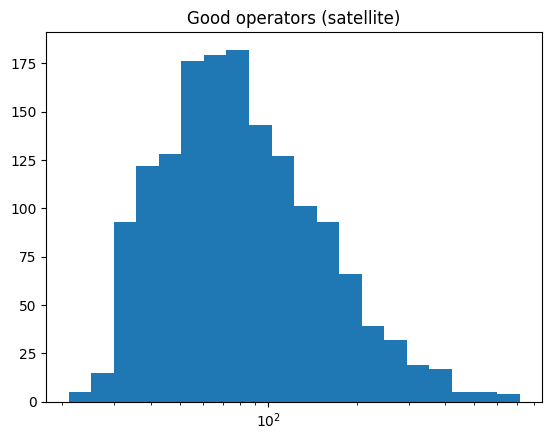

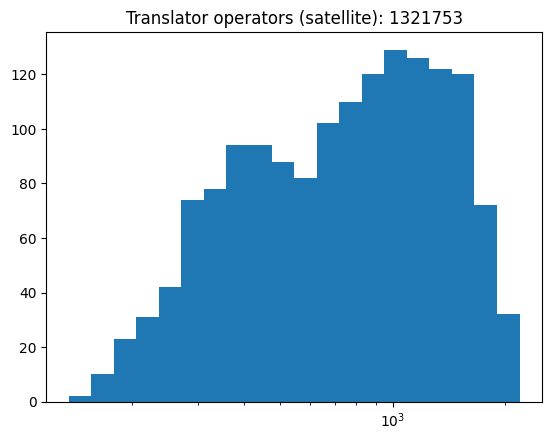

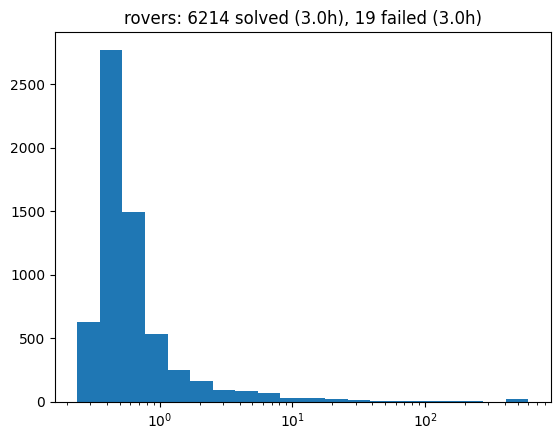

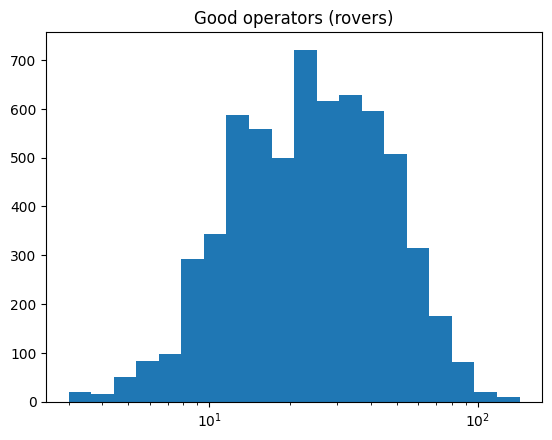

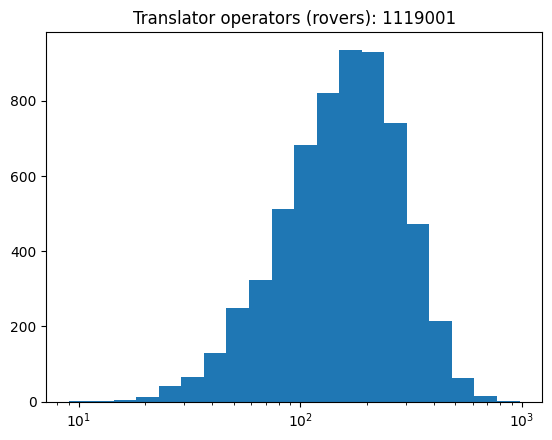

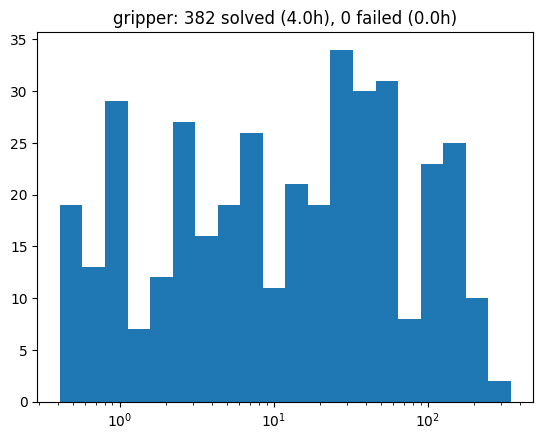

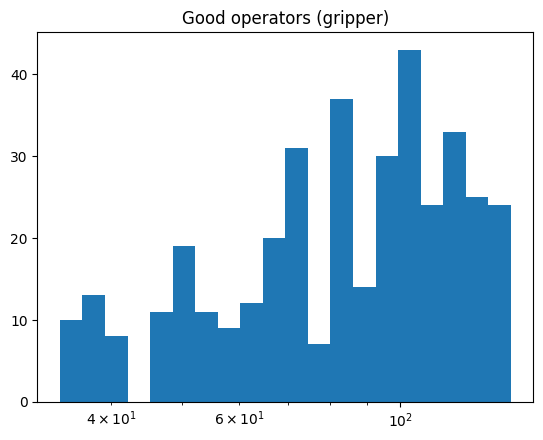

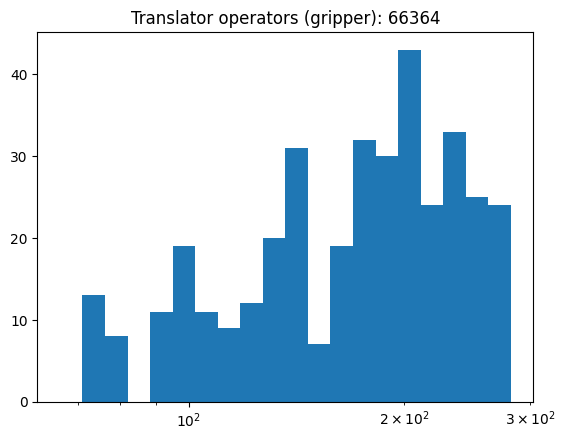

In [14]:
import os 
import json
import matplotlib.pyplot as plt
import numpy as np


def gen_plot(data, title ): 
    hist, bins = np.histogram(data, bins=20)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(data, bins=logbins)
    plt.xscale('log')
    plt.title(title)
    plt.show()


for domain in os.listdir("data"): 
    dir = f"data/{domain}/good-operators-unit"

    times = []
    solved_times = []
    solved_translator_operators = []
    solved_good_operators = []
    
    for p in os.listdir(dir): 
        with open(f"{dir}/{p}/properties") as f: 
            data =json.load(f)
            if data['coverage'] == 1: 
                solved_times.append(data['planner_wall_clock_time'])
                solved_translator_operators.append(data['translator_operators'])
                solved_good_operators.append(data['num_good_operators'])
            times.append(data['planner_wall_clock_time'])

    time_solved = sum(solved_times)/3600
    num_solved = len(solved_times)
    num_unsolved = len(times)-len(solved_times)
    time_unsolved = (sum(times) - sum(solved_times))/3600

    gen_plot(times, f"{domain}: {num_solved} solved ({time_solved:.1f}h), {num_unsolved} failed ({time_unsolved:.1f}h)")
    gen_plot(solved_good_operators, f"Good operators ({domain})")
    gen_plot(solved_translator_operators, f"Translator operators ({domain}): {sum(solved_translator_operators)}")


